In [1]:
                                                                                                                       
###############################################################################                                                 
########################### Main File #########################################                                                 
###############################################################################                                                 
                                                                                                                                
                                                                                                                                
####################### General imports #######################################                                                 
import numpy as np                                                                                                              
import math                                                                                                                     
import matplotlib.pyplot as plt                                                                                                 
import seaborn as sns                                                                                                           
import pandas as pd                                                                                                             
import random                                                                                                                   
from scipy.optimize import minimize    
%matplotlib inline
                                                                                                                                
                                                                                                                                                                                                                                                 
                                       # instantiating pcfg generator                                    
random.seed(1)                              # setting random.seed to allow replication of mcmc chain                            
adaptive_100 = pd.read_csv('summary_adaptive_pruned_grammar_1_remains_val_probs.csv')  # getting the preprocessed data file                              
non_adaptive_100 = pd.read_csv('summary_non_adaptive_pruned_1_remains.csv')   
main_data_fromatted = pd.read_csv('main_data_formatted.csv')
                                                                                                                                
####################### Grammar ##############################################                                                  

                                                                                                                                                                                                                 
#                                                                                                                               
                                                                                                                                
# trials = eval(main_data_formatted['data'][2])[:8]                                                                               
# df_prior = mh_mcmc_sampler(productions,trials, ground_truth=False, iter = 0)[0] # creating empty data for first initial rules   
# for i in range(1):                                                                                                              
#      prior_df_and_details = mh_mcmc_sampler(productions, trials, ground_truth=False, iter =5 ,type='prior',out_penalizer=5)    
#      df_prior = df_prior.append(prior_df_and_details[0])                                                                        
                                                                                                                                
# #                                                                                                                               
                                                                                                                                
# ax = sns.countplot(x="rulestring", data=df_prior)                                                                               
# plt.figure(figsize=(2, 2))                                                                                                      
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize = 8)                                                 
# plt.tight_layout()                                                                                                              
# plt.show()#                                                                                                                     
main_data_fromatted                                                                                                                             

FileNotFoundError: File b'summary_adaptive_pruned_grammar_1_remains_val_probs.csv' does not exist

In [304]:
adaptive_100 = pd.read_csv('summary_adaptive_pruned_grammar_10_remain_val_probs16.csv')  # getting the preprocessed data file                              
non_adaptive_100 = pd.read_csv('summary_non_adaptive_pruned_10_remain16.csv')   

from statistics import mean
# analysing results of adaptive sampling
prior_acc_adapt_100 = []
prior_BIC_adapt_100 = []
prior_ll_adapt_100 = []
prior_ll_baseline = []

for i in range (0, len(adaptive_100['rule_name'])):
    if adaptive_100['rule_name'][i] == 'Omega' or adaptive_100['rule_name'][i] == 'Upsilon' or adaptive_100['rule_name'][i] == 'Kappa' or adaptive_100['rule_name'][i] == 'Iota' or adaptive_100['rule_name'][i] == 'Zeta':
#         if adaptive_100['rule_name'][i] == 'Zeta':
        prior_acc_adapt_100.append(adaptive_100['prior_acc_single'][i])
        prior_BIC_adapt_100.append(adaptive_100['BIC_model_prior'][i])
        prior_ll_adapt_100.append(adaptive_100['log_ll_model_prior'][i])
        prior_ll_baseline.append(adaptive_100['log_ll_baseline_prior'][i])

print('adaptive')
print(mean(prior_acc_adapt_100))
print(mean(prior_BIC_adapt_100))
print(mean(prior_ll_adapt_100))
print(mean(prior_ll_baseline))


from statistics import mean
# analysing results of adaptive sampling
prior_acc_n_adapt_100 = []
prior_BIC_n_adapt_100 = []
prior_ll_n_adapt_100 = []
prior_ll_n_baseline = []

for i in range (0, len(non_adaptive_100['rule_name'])):
    if non_adaptive_100['rule_name'][i] == 'Omega' or non_adaptive_100['rule_name'][i] == 'Upsilon' or non_adaptive_100['rule_name'][i] == 'Kappa' or non_adaptive_100['rule_name'][i] == 'Iota' or non_adaptive_100['rule_name'][i] == 'Zeta':
#         if non_adaptive_100['rule_name'][i] == 'Zeta':
        prior_acc_n_adapt_100.append(non_adaptive_100['prior_acc_single'][i])
        prior_BIC_n_adapt_100.append(non_adaptive_100['BIC_model_prior'][i])
        prior_ll_n_adapt_100.append(non_adaptive_100['log_ll_model_prior'][i])
        prior_ll_n_baseline.append(non_adaptive_100['log_ll_baseline_prior'][i])

print('non_adaptive')
print(mean(prior_acc_n_adapt_100))
print(mean(prior_BIC_n_adapt_100))
print(mean(prior_ll_n_adapt_100))
print(mean(prior_ll_n_baseline))
# print(prior_ll_n_adapt_100)

# adaptive
# 7:3 for 10 iterations, one surviving hypothesis for first comparison
# won second but forgot numbers 
# third one for 10 iterations: 11:5 

adaptive
0.6057692307692307
11.49675665183637
-4.7086575550782666
-5.545177444479562
non_adaptive
0.5913461538461539
11.241543097111144
-4.581050777715654
-5.545177444479562


In [264]:
def check_feat_change_both_directions(features,follow):
    '''check when features have changed from one trial scene to the next 
    to establish covariation with True / False pattern and score those features and values that 
    contribute to change, independent of the direction, which means that both presence and absence of features 
    are scored'''
    val_set = set([val for sublist in features for val in sublist])
    val_score_dict = {el:0 for el in val_set}
    ind_next = 0
    change_sum = []
    for i in features:
        change = []
        ind_next += 1
        if ind_next == len(features):
            ind_next = 0

        if set(i) == set(features[ind_next]) and len(i) == len(features[ind_next]):
            change.append(0)
        else:
            change.append(1)
            set_init = set(i).difference(set(features[ind_next]))
            set_next = set(features[ind_next]).difference(set(i))
            if follow[features.index(i)] == True and follow[ind_next] == False:
                for value in set_init:
                    val_score_dict[value] += 1
                for value in set_next:
                    val_score_dict[value] += 1
            if follow[ind_next]== True and follow[features.index(i)]== False:
                for value in set_next:
                    val_score_dict[value] += 1
                for value in set_init:
                    val_score_dict[value] += 1
                              
        if sum(change) == 0:
            change_sum.append(False)
        else:
            change_sum.append(True)   

    return {'feat_change': change_sum, 'val_change': val_score_dict, 'sum_values': sum(val_score_dict.values())}
    


In [249]:
colours = []
follow = []
for i in eval(main_data_fromatted['data'][25])[:8]:
#     print(i['colours'])
#     print(i['follow_rule'])
    follow.append(i['follow_rule'])
    colours.append(i['colours'])
print(check_feat_change_single_comparison(colours,follow))
# print(check_feat_change(colours,follow)['sum_values'])

# print(set([val for sublist in colours for val in sublist]))

{'val_change': {'red': 0, 'green': 1}, 'sum_values': 1}


In [247]:
def check_feat_change_single_comparison_both_directions(features,follow):
    '''same as the above just for a single comparison between all rule following scenes and all not rule following scenes
    '''
    set_follow = []
    set_no_follow = []
    val_set = set([val for sublist in features for val in sublist])
    val_score_dict = {el:0 for el in val_set}
    
    # separating rule following scenes from scenes that do not follow the rule 
    for feature in features:
        if follow[features.index(feature)] == True:
            set_follow.append(feature)
        elif follow[features.index(feature)] == False:
            set_no_follow.append(feature)
            
    set_follow = [val for sublist in set_follow for val in sublist]
    set_no_follow = [val for sublist in set_no_follow for val in sublist]

    
    # comparing the sets of the above and scoring features that are different between scenes 
    set_follow = set(set_follow).difference(set(set_no_follow))
    set_no_follow = set(set_no_follow).difference(set(set_follow))
    
    for value in set_follow:
        val_score_dict[value] += 1
        
    for value in set_no_follow:
        val_score_dict[value] += 1
    
    return {'val_change': val_score_dict, 'sum_values': sum(val_score_dict.values())}
                    
                
    
  

    
        
        
        
    


    




In [258]:
print(check_feat_change_single_comparison_both_directions(colours,follow))

{'val_change': {'red': 1, 'green': 1}, 'sum_values': 2}


In [250]:
def check_feat_change_single_comparison_presence(features,follow):
    '''same as the above just focusing on presence of features '''
    set_follow = []
    set_no_follow = []
    val_set = set([val for sublist in features for val in sublist])
    val_score_dict = {el:0 for el in val_set}
    
    # separating rule following scenes from scenes that do not follow the rule 
    for feature in features:
        if follow[features.index(feature)] == True:
            set_follow.append(feature)
        elif follow[features.index(feature)] == False:
            set_no_follow.append(feature)
            
    set_follow = [val for sublist in set_follow for val in sublist]
    set_no_follow = [val for sublist in set_no_follow for val in sublist]

    
    # comparing the sets of the above and scoring features that are different between scenes 
    set_follow = set(set_follow).difference(set(set_no_follow))
    set_no_follow = set(set_no_follow).difference(set(set_follow))
    
    for value in set_follow:
        val_score_dict[value] += 1
        
#     for value in set_no_follow:
#         val_score_dict[value] += 1
    
    return {'val_change': val_score_dict, 'sum_values': sum(val_score_dict.values())}
                    
                
    
  

    
        
        
        
    


    




In [251]:
print(check_feat_change_single_comparison_presence(colours,follow))

{'val_change': {'red': 1, 'green': 0}, 'sum_values': 1}


In [252]:
def check_feat_change_single_comparison_absence(features,follow):
    '''same as the above just focusing on absence of features '''
    set_follow = []
    set_no_follow = []
    val_set = set([val for sublist in features for val in sublist])
    val_score_dict = {el:0 for el in val_set}
    
    # separating rule following scenes from scenes that do not follow the rule 
    for feature in features:
        if follow[features.index(feature)] == True:
            set_follow.append(feature)
        elif follow[features.index(feature)] == False:
            set_no_follow.append(feature)
            
    set_follow = [val for sublist in set_follow for val in sublist]
    set_no_follow = [val for sublist in set_no_follow for val in sublist]

    
    # comparing the sets of the above and scoring features that are different between scenes 
    set_follow = set(set_follow).difference(set(set_no_follow))
    set_no_follow = set(set_no_follow).difference(set(set_follow))
    
#     for value in set_follow:
#         val_score_dict[value] += 1
        
    for value in set_no_follow:
        val_score_dict[value] += 1
    
    return {'val_change': val_score_dict, 'sum_values': sum(val_score_dict.values())}
                    
                
    
  

    
        
        
        
    


    




In [253]:
print(check_feat_change_single_comparison_absence(colours,follow))

{'val_change': {'red': 0, 'green': 1}, 'sum_values': 1}


In [254]:
def check_feat_change_presence(features,follow,default='set'):
    '''check when features have changed from one trial scene to the next 
    to establish covariation with True / False pattern focusing only on present features '''
    val_set = set([val for sublist in features for val in sublist])
    val_score_dict = {el:0 for el in val_set}
#     print(follow)
    ind_next = 0
    yes = 0
    no = 0
    change_sum = []
    for i in features:
        change = []
        ind_next += 1
        if ind_next == len(features):
            ind_next = 0
        
        if default == 'set':
            if set(i) == set(features[ind_next]) and len(i) == len(features[ind_next]):
                change.append(0)
            else:
                change.append(1)
#                 print('diff_to_next')
#                 print(follow[features.index(i)])
                set_init = set(i).difference(set(features[ind_next]))
                set_next = set(features[ind_next]).difference(set(i))
                if follow[features.index(i)] == True and follow[ind_next] == False:
                    for value in set_init:
#                         print(value)
                        val_score_dict[value] += 1
                        yes +=1
#                     for value in set_next:
#                         val_score_dict[value] += 1
#                         no +=1
                if follow[ind_next]== True and follow[features.index(i)]== False:
                    for value in set_next:
#                         print(value)
                        val_score_dict[value] += 1
                        yes +=1
#                     for value in set_init:
#                         val_score_dict[value] += 1
#                         no +=1
                    
                
        if sum(change) == 0:
            change_sum.append(False)
        else:
            change_sum.append(True)   
#     print(yes)
#     print('va')
#     print(no)
    return {'feat_change': change_sum, 'val_change': val_score_dict, 'sum_values': sum(val_score_dict.values())}
    


In [255]:
print(check_feat_change_presence(colours,follow))

{'feat_change': [True, True, True, True, True, True, True, True], 'val_change': {'red': 2, 'green': 0}, 'sum_values': 2}


In [256]:
def check_feat_change_absence(features,follow,default='set'):
    '''check when features have changed from one trial scene to the next 
    to establish covariation with True / False pattern focusing only on absent features'''
    val_set = set([val for sublist in features for val in sublist])
    val_score_dict = {el:0 for el in val_set}
#     print(follow)
    ind_next = 0
    yes = 0
    no = 0
    change_sum = []
    for i in features:
        change = []
        ind_next += 1
        if ind_next == len(features):
            ind_next = 0
        
        if default == 'set':
            if set(i) == set(features[ind_next]) and len(i) == len(features[ind_next]):
                change.append(0)
            else:
                change.append(1)
#                 print('diff_to_next')
#                 print(follow[features.index(i)])
                set_init = set(i).difference(set(features[ind_next]))
                set_next = set(features[ind_next]).difference(set(i))
                if follow[features.index(i)] == True and follow[ind_next] == False:
#                     for value in set_init:
# #                         print(value)
#                         val_score_dict[value] += 1
#                         yes +=1
                    for value in set_next:
                        val_score_dict[value] += 1
                        no +=1
                if follow[ind_next]== True and follow[features.index(i)]== False:
#                     for value in set_next:
# #                         print(value)
#                         val_score_dict[value] += 1
#                         yes +=1
                    for value in set_init:
                        val_score_dict[value] += 1
                        no +=1
                    
                
        if sum(change) == 0:
            change_sum.append(False)
        else:
            change_sum.append(True)   
#     print(yes)
#     print('va')
#     print(no)
    return {'feat_change': change_sum, 'val_change': val_score_dict, 'sum_values': sum(val_score_dict.values())}
    


In [257]:
print(check_feat_change_absence(colours,follow))

{'feat_change': [True, True, True, True, True, True, True, True], 'val_change': {'red': 0, 'green': 2}, 'sum_values': 2}


In [300]:
print(0 % 20)

0


In [301]:
print(3*[1])

[1, 1, 1]


In [38]:
import pandas as pd
main_data_fromatted = pd.read_csv('main_data_formatted.csv')

main_data_formatted = main_data_fromatted.query("rule_name == 'Omega' or rule_name == 'Upsilon' or rule_name == 'Kappa' or rule_name == 'Iota' or rule_name == 'Zeta'")
# Remove matching rows

main_data_formatted = main_data_formatted.reset_index(drop=True)

In [43]:
i = 0
for data in main_data_formatted['data']:
    print(main_data_formatted['token_id'][i])
    
    i +=1


WjsXkIQV1LXVlJmcAAAJ
WjsXkIQV1LXVlJmcAAAJ
WjsXkIQV1LXVlJmcAAAJ
WjsXkIQV1LXVlJmcAAAJ
piHJRkGAQiNDVM_pAAAL
piHJRkGAQiNDVM_pAAAL
piHJRkGAQiNDVM_pAAAL
piHJRkGAQiNDVM_pAAAL
zZ5CYdb0UfG8F3vRAAAS
zZ5CYdb0UfG8F3vRAAAS
zZ5CYdb0UfG8F3vRAAAS
Sx5A2_s1FPDoUsTLAAAT
Sx5A2_s1FPDoUsTLAAAT
Sx5A2_s1FPDoUsTLAAAT
3ioMahe1PAlAZAq3AAAo
3ioMahe1PAlAZAq3AAAo
3ioMahe1PAlAZAq3AAAo
QfKnfyfq6JquRFv-AAAn
QfKnfyfq6JquRFv-AAAn
QfKnfyfq6JquRFv-AAAn
frTISZa6hmSHzqZ5AAAR
frTISZa6hmSHzqZ5AAAR
Bnn_5BwOU-b2u3nNAAAQ
Bnn_5BwOU-b2u3nNAAAQ
tcpjkowfzbo-RzgvAAAp
tcpjkowfzbo-RzgvAAAp
sIBlk-qFcNY4fsGyAAAq
sIBlk-qFcNY4fsGyAAAq
LBEcjjqzWFjFJ2UzAAA3
4gdK7_T_qCWuODBvAAA2
ZDHBoIsVsfDX9Vf2AAA_
ZDHBoIsVsfDX9Vf2AAA_
ZDHBoIsVsfDX9Vf2AAA_
oim2MThVnPjmiu2OAABB
oim2MThVnPjmiu2OAABB
oim2MThVnPjmiu2OAABB
aY3043wGsEt2gN1KAABI
aY3043wGsEt2gN1KAABI
aY3043wGsEt2gN1KAABI
A-8J0T6shEk5TGpmAABH
A-8J0T6shEk5TGpmAABH
A-8J0T6shEk5TGpmAABH
Kh5yAD9GF2sgDjsMAAAz
Kh5yAD9GF2sgDjsMAAAz
Kh5yAD9GF2sgDjsMAAAz
KQ-7jJWvGKznfX5_AAA0
KQ-7jJWvGKznfX5_AAA0
KQ-7jJWvGKznf

In [68]:
k = main_data_formatted.groupby('token_id').size()

In [70]:
groups = dict(k)

In [73]:
l = [1,1,1,4]
print(l[0:4])

[1, 1, 1, 4]


In [75]:
rat = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [77]:
rat[3-(4-1):]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

import pandas as pd
from statistics import mean
log_adapt = []
log_no_adapt = []
BIC_adapt = []
BIC_no_adapt = []

BIC_adapt_pomap = []
BIC_no_adapt_pomap = []

BIC_adapt_pomall = []
BIC_no_adapt_pomall = []

taus_a = []
taus_na = []

acc_a_pr = []
acc_na_pr = []

acc_a_pomap = []
acc_na_pomap = []

acc_a_poall = []
acc_na_poall = []


for i in range():
#     adaptive_100 = pd.read_csv('boolean_adatpive_10_survive/8_training_data/boolean_adaptive_pcfg_5_rules_5_penalisation_cond_30_round_'+str(i)+'.csv')  # getting the preprocessed data file                              
    no_adaptive_100 = pd.read_csv('model_results/normative_res_con_one_'+str(i)+'_new_models.csv')   
# #     log_adapt.append(mean(adaptive_100['ll_model_all_subjects_prior']))
#     log_no_adapt.append(mean(no_adaptive_100['ll_model_all_subjects_prior_label']))
#     BIC_adapt.append(mean(adaptive_100['BICs_model_all_subjects_prior']))
    BIC_no_adapt.append(mean(no_adaptive_100['BICs_model_all_subjects_prior_label']))
#     BIC_adapt_pomap.append(mean(adaptive_100['BICs_model_all_subjects_post_map']))
    BIC_no_adapt_pomap.append(mean(no_adaptive_100['BICs_model_all_subjects_post_map']))
#     BIC_adapt_pomall.append(mean(adaptive_100['BICs_model_all_subjects_post_all']))
#     BIC_no_adapt_pomall.append(mean(no_adaptive_100['BICs_model_all_subjects_post_all']))
# #     taus_a.append(mean(adaptive_100['fitted_taus_all_subjects_prior']))
#     taus_na.append(mean(no_adaptive_100['fitted_taus_all_subjects_prior']))
# #     acc_a_pr.append(mean(adaptive_100['prior_acc']))
#     acc_na_pr.append(mean(no_adaptive_100['prior_acc']))
# #     acc_a_pomap.append(mean(adaptive_100['post_map_acc']))
# #     acc_a_poall.append(mean(adaptive_100['post_all_acc']))
#     acc_na_pomap.append(mean(no_adaptive_100['post_map_acc']))
#     acc_na_poall.append(mean(no_adaptive_100['post_all_acc']))

# print(log_adapt)
# print(log_no_adapt)
# print(mean(log_ada/pt))
# print(mean(log_no_adapt))
# print(mean(BIC_adapt))
print(mean(BIC_no_adapt))
# print(mean(BIC_adapt_pomap))
print(mean(BIC_no_adapt_pomap))
# print(mean(BIC_adapt_pomall))
# print(mean(BIC_no_adapt_pomall))
# print(mean(taus_a))
# print(mean(taus_na))
# print(mean(acc_a_pr))
# print(mean(acc_na_pr))
# print(mean(acc_a_pomap))
# print(mean(acc_na_pomap))
# print(mean(acc_a_poall))
# print(mean(acc_na_poall))

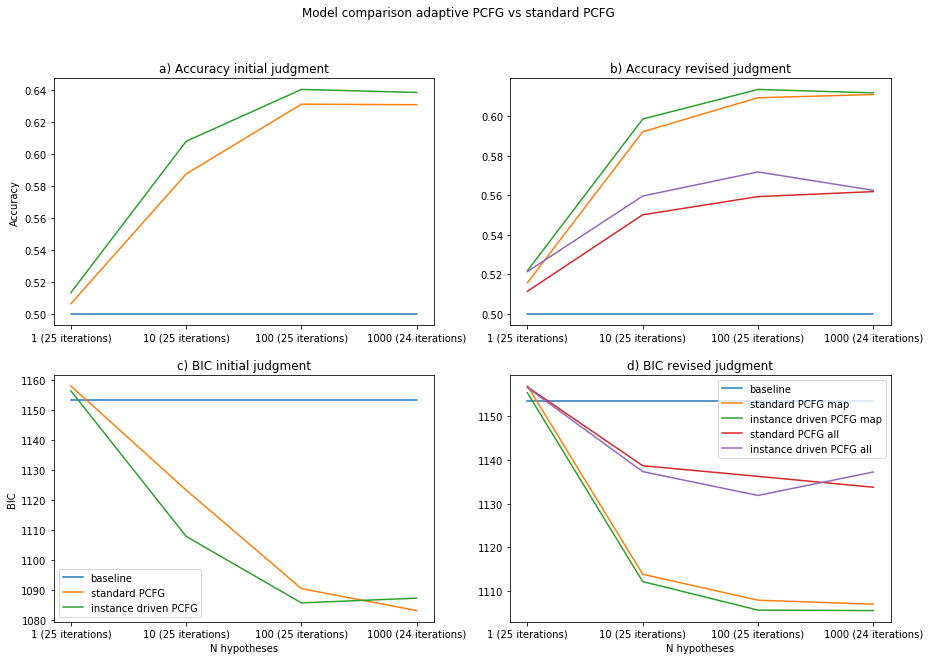

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline

fig,axs = plt.subplots(2, 2,figsize=(15,10))
fig.suptitle('Model comparison adaptive PCFG vs standard PCFG')

plt.rcParams.update({'font.size': 10})
idpcfg= [0.5133653846153846,0.6078365384615385,0.6401923076923077,0.6383213141025641]
spcfg = [0.5064423076923077,0.5874519230769231,0.6310096153846154,0.6306590544871795]
baseline = [.5,.5,.5,.5]
n_hyp = ["1 (25 iterations)", "10 (25 iterations)", "100 (25 iterations)", "1000 (24 iterations)"]

axs[0,0].set_title('a) Accuracy initial judgment')
axs[0,0].set(ylabel='Accuracy')
axs[0,0].plot(n_hyp, baseline, label="baseline")
axs[0,0].plot(n_hyp, spcfg, label="standard PCFG")
axs[0,0].plot(n_hyp, idpcfg, label="instance driven PCFG")



idpcfg= [0.521875,0.5984134615384615,0.6133653846153846,0.6116286057692307]
spcfg = [0.5158173076923077,0.592,0.6091826923076923,0.6107772435897436]
idpcfgall = [0.5214423076923077,0.5595673076923077,0.5717307692307693,0.5624499198717948]
spcfgall = [0.5114903846153847,0.5500961538461538,0.5592788461538462,0.5617988782051282]
baseline = [.5,.5,.5,.5]
n_hyp = ["1 (25 iterations)", "10 (25 iterations)", "100 (25 iterations)", "1000 (24 iterations)"]

axs[0,1].set_title('b) Accuracy revised judgment')
# axs[0,1].set(xlabel='N hypotheses')
axs[0,1].plot(n_hyp, baseline, label="baseline")
axs[0,1].plot(n_hyp, spcfg, label="standard PCFG map")
axs[0,1].plot(n_hyp, idpcfg, label="instance driven PCFG map")
axs[0,1].plot(n_hyp, spcfgall, label="standard PCFG all")
axs[0,1].plot(n_hyp, idpcfgall, label="instance driven PCFG all")



idpcfg= [1156.4596200280437,1107.9673821875224,1085.8162643900894,1087.396243820924]
spcfg = [1158.0799147125574,1123.3771210939808,1090.5523641533478,1083.2577439852266]
baseline = [1153.39690845174,1153.39690845174,1153.39690845174,1153.39690845174]
n_hyp = ["1 (25 iterations)", "10 (25 iterations)", "100 (25 iterations)", "1000 (24 iterations)"]

axs[1,0].set_title('c) BIC initial judgment')
axs[1,0].set(xlabel='N hypotheses', ylabel='BIC')
axs[1,0].plot(n_hyp, baseline, label="baseline")
axs[1,0].plot(n_hyp, spcfg, label="standard PCFG")
axs[1,0].plot(n_hyp, idpcfg, label="instance driven PCFG")
axs[1,0].legend()


idpcfg= [1155.234825275421,1112.1941366764747,1105.6880739193202,1105.5887053958165]
spcfg = [1156.8032379777421,1113.8654503850332,1107.9531323968188,1107.037897940522]
idpcfgall= [1156.4143760312963,1137.2671091988,1131.8374904949578,1137.1806656602873]
spcfgall = [1156.5723768428843,1138.6136684871637,1136.1899533524356,1133.7093950569144]
baseline = [1153.39690845174,1153.39690845174,1153.39690845174,1153.39690845174]
n_hyp = ["1 (25 iterations)", "10 (25 iterations)", "100 (25 iterations)", "1000 (24 iterations)"]

axs[1,1].set_title('d) BIC revised judgment')
axs[1,1].set(xlabel='N hypotheses')
axs[1,1].plot(n_hyp, baseline, label="baseline")
axs[1,1].plot(n_hyp, spcfg, label="standard PCFG map")
axs[1,1].plot(n_hyp, idpcfg, label="instance driven PCFG map")
axs[1,1].plot(n_hyp, spcfgall, label="standard PCFG all")
axs[1,1].plot(n_hyp, idpcfgall, label="instance driven PCFG all")
axs[1,1].legend()




plt.savefig('model_res_pdfs/idg_pcfg_comparison_cond_1.pdf')
plt.show()



In [1]:
import pandas as pd
from statistics import mean
log_adapt = []
log_no_adapt = []
BIC_adapt = []
BIC_no_adapt = []

BIC_adapt_pomap = []
BIC_no_adapt_pomap = []

BIC_baseline = []
BIC_adapt_pomall = []
BIC_no_adapt_pomall = []

taus_a = []
taus_na = []

acc_a_pr = []
acc_na_pr = []

acc_a_pomap = []
acc_na_pomap = []

acc_a_poall = []
acc_na_poall = []


for i in range(4):
    adaptive_100 = pd.read_csv('model_results/normative_res_con_one_'+str(i)+'_new_models.csv')  # getting the preprocessed data file                              
#     no_adaptive_100 = pd.read_csv('boolean_adatpive_10_survive/8_training_data/boolean_not_adaptive_pcfg_5_rules_5_penalisation'+str(i)+'.csv')   
#     log_adapt.append(mean(adaptive_100['ll_model_all_subjects_prior_label']))
#     log_no_adapt.append(mean(no_adaptive_100['ll_model_all_subjects_prior']))
    BIC_adapt.append(mean(adaptive_100['BICs_model_all_subjects_prior_label']))
#     BIC_baseline.append(mean(adaptive_100['BICs_baseline_all_subjects_prior']))
#     BIC_no_adapt.append(mean(no_adaptive_100['BICs_model_all_subjects_prior']))
    BIC_adapt_pomap.append(mean(adaptive_100['BICs_model_all_subjects_post_map']))
#     BIC_no_adapt_pomap.append(mean(no_adaptive_100['BICs_model_all_subjects_post_map']))
#     BIC_adapt_pomall.append(mean(adaptive_100['BICs_model_all_subjects_post_all']))
#     BIC_no_adapt_pomall.append(mean(no_adaptive_100['BICs_model_all_subjects_post_all']))
#     taus_a.append(mean(adaptive_100['fitted_taus_all_subjects_prior']))
#     taus_na.append(mean(no_adaptive_100['fitted_taus_all_subjects_prior']))
#     acc_a_pr.append(mean(adaptive_100['prior_acc']))
# #     acc_na_pr.append(mean(no_adaptive_100['prior_acc']))
#     acc_a_pomap.append(mean(adaptive_100['post_map_acc']))
#     acc_a_poall.append(mean(adaptive_100['post_all_acc']))
# #     acc_na_pomap.append(mean(no_adaptive_100['post_map_acc']))
# #     acc_na_poall.append(mean(no_adaptive_100['post_all_acc']))
# print(log_adapt)
# # print(log_no_adapt)
# print(mean(log_adapt))
# # print(mean(log_no_adapt))
print(mean(BIC_adapt))
# print(mean(BIC_no_adapt))
print(mean(BIC_adapt_pomap))
# print(mean(BIC_no_adapt_pomap))
# print(mean(BIC_adapt_pomall))
# # print(mean(BIC_no_adapt_pomall))
# print(mean(taus_a))
# # print(mean(taus_na))
# print(mean(acc_a_pr))
# # print(mean(acc_na_pr))
# print(mean(acc_a_pomap))
# # print(mean(acc_na_pomap))
# print(mean(acc_a_poall))
# print(BIC_baseline)
# # print(mean(acc_na_poall))

211.45130564716746
207.7135224405165


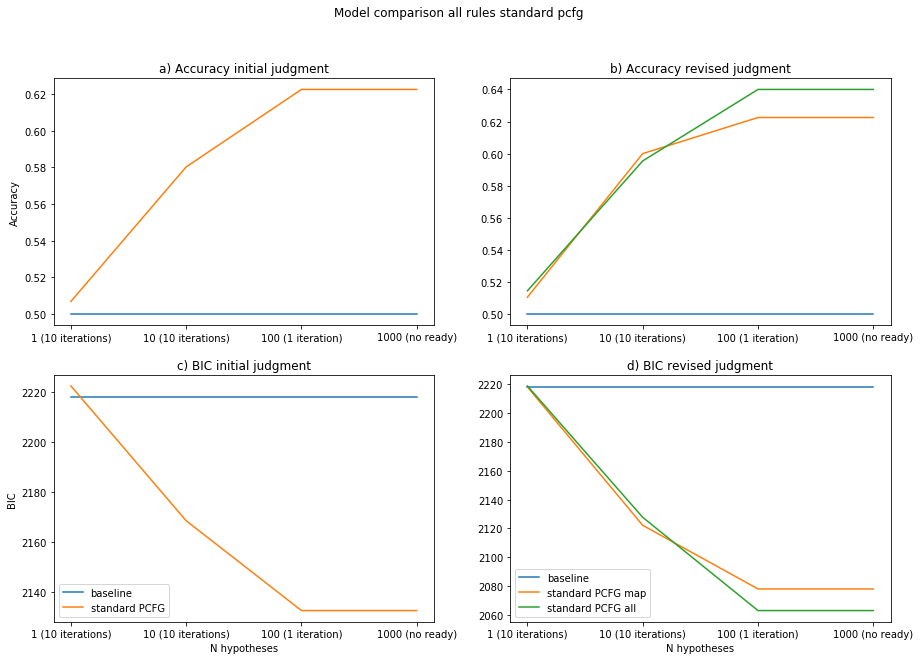

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline

fig,axs = plt.subplots(2, 2,figsize=(15,10))
fig.suptitle('Model comparison all rules standard pcfg')

plt.rcParams.update({'font.size': 10})
spcfg = [0.506875,0.5802499999999999,0.6225,0.6225]
baseline = [.5,.5,.5,.5]
n_hyp = ["1 (10 iterations)", "10 (10 iterations)", "100 (1 iteration)", "1000 (no ready)"]

axs[0,0].set_title('a) Accuracy initial judgment')
axs[0,0].set(ylabel='Accuracy')
axs[0,0].plot(n_hyp, baseline, label="baseline")
axs[0,0].plot(n_hyp, spcfg, label="standard PCFG")




spcfg = [0.5105208333333333,0.6,0.6225,0.6225]
spcfgall = [0.5144791666666667,0.5954375,0.64,0.64]
baseline = [.5,.5,.5,.5]
n_hyp = ["1 (10 iterations)", "10 (10 iterations)", "100 (1 iteration)", "1000 (no ready)"]

axs[0,1].set_title('b) Accuracy revised judgment')
# axs[0,1].set(xlabel='N hypotheses')
axs[0,1].plot(n_hyp, baseline, label="baseline")
axs[0,1].plot(n_hyp, spcfg, label="standard PCFG map")
axs[0,1].plot(n_hyp, spcfgall, label="standard PCFG all")


spcfg = [2222.37226426059,2168.4336573595438,2132.4925683861647,2132.4925683861647]
baseline = [2218.0709777918246] * 4
n_hyp = ["1 (10 iterations)", "10 (10 iterations)", "100 (1 iteration)", "1000 (no ready)"]

axs[1,0].set_title('c) BIC initial judgment')
axs[1,0].set(xlabel='N hypotheses', ylabel='BIC')
axs[1,0].plot(n_hyp, baseline, label="baseline")
axs[1,0].plot(n_hyp, spcfg, label="standard PCFG")
axs[1,0].legend()



spcfg = [2218.0856661690523,2122.1257578955206,2078,2078]
spcfgall = [2218.782115110092,2127.6815561022254,2063,2063]
baseline = [2218.0709777918246] * 4
n_hyp = ["1 (10 iterations)", "10 (10 iterations)", "100 (1 iteration)", "1000 (no ready)"]

axs[1,1].set_title('d) BIC revised judgment')
axs[1,1].set(xlabel='N hypotheses')
axs[1,1].plot(n_hyp, baseline, label="baseline")
axs[1,1].plot(n_hyp, spcfg, label="standard PCFG map")
axs[1,1].plot(n_hyp, spcfgall, label="standard PCFG all")
axs[1,1].legend()




plt.savefig('model_res_pdfs/idg_pcfg_standard_comparison.pdf')
plt.show()



In [167]:
print('cat')

cat


In [ ]:
4975.856921241109
4980.783504569057
4969.712778240245
4981.564330638579
4967.977789096306
4978.88635177026
5.938540803216568
6.106523557542109
0.5964333333333334
0.5803
0.6241777777777778
0.5928666666666667
0.6272
0.6045888888888888

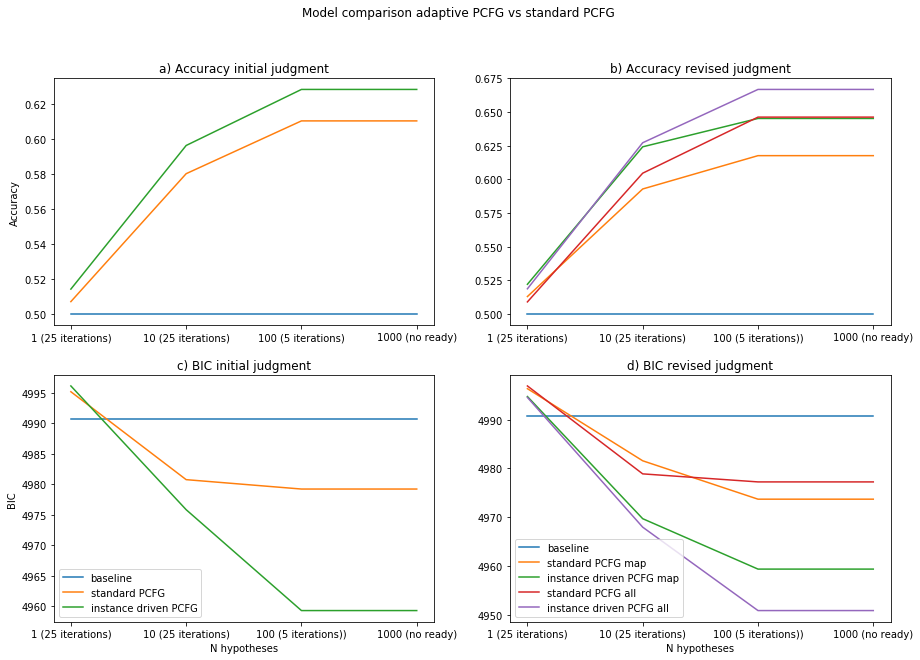

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

fig,axs = plt.subplots(2, 2,figsize=(15,10))
fig.suptitle('Model comparison adaptive PCFG vs standard PCFG')

plt.rcParams.update({'font.size': 10})
idpcfg= [0.5142777777777778,0.5964333333333334,0.6285000000000001,0.6285000000000001]
spcfg = [0.5071111111111111,0.5803,0.6105,0.6105]
baseline = [.5,.5,.5,.5]
n_hyp = ["1 (25 iterations)", "10 (25 iterations)", "100 (5 iterations)", "1000 (no ready)"]

axs[0,0].set_title('a) Accuracy initial judgment')
axs[0,0].set(ylabel='Accuracy')
axs[0,0].plot(n_hyp, baseline, label="baseline")
axs[0,0].plot(n_hyp, spcfg, label="standard PCFG")
axs[0,0].plot(n_hyp, idpcfg, label="instance driven PCFG")



idpcfg= [0.5221,0.6241777777777778,0.6452222222222223,0.6452222222222223]
spcfg = [0.513,0.5928666666666667,0.6176111111111111,0.6176111111111111]
idpcfgall = [0.5187555555555555,0.6272,0.6667777777777778,0.6667777777777778]
spcfgall = [0.5090222222222223,0.6045888888888888,0.6462222222222223,0.6462222222222223]
baseline = [.5,.5,.5,.5]
n_hyp = ["1 (25 iterations)", "10 (25 iterations)", "100 (5 iterations))", "1000 (no ready)"]

axs[0,1].set_title('b) Accuracy revised judgment')
# axs[0,1].set(xlabel='N hypotheses')
axs[0,1].plot(n_hyp, baseline, label="baseline")
axs[0,1].plot(n_hyp, spcfg, label="standard PCFG map")
axs[0,1].plot(n_hyp, idpcfg, label="instance driven PCFG map")
axs[0,1].plot(n_hyp, spcfgall, label="standard PCFG all")
axs[0,1].plot(n_hyp, idpcfgall, label="instance driven PCFG all")



idpcfg= [4996.15328829045,4975.856921241109,4959.311238143234,4959.311238143234]
spcfg = [4995.204225896198,4980.783504569057,4979.2439155595375,4979.2439155595375]
baseline = [4990.6597000316,4990.6597000316,4990.6597000316,4990.6597000316]
n_hyp = ["1 (25 iterations)", "10 (25 iterations)", "100 (5 iterations))", "1000 (no ready)"]

axs[1,0].set_title('c) BIC initial judgment')
axs[1,0].set(xlabel='N hypotheses', ylabel='BIC')
axs[1,0].plot(n_hyp, baseline, label="baseline")
axs[1,0].plot(n_hyp, spcfg, label="standard PCFG")
axs[1,0].plot(n_hyp, idpcfg, label="instance driven PCFG")
axs[1,0].legend()


idpcfg= [4994.714597721887,4969.712778240245,4959.396279172287,4959.396279172287]
spcfg = [4996.323753326966,4981.564330638579,4973.707744989932,4973.707744989932]
idpcfgall= [4994.532469365878,4967.977789096306,4950.909598893734,4950.909598893734]
spcfgall = [4996.883117153712,4978.88635177026,4977.241706551394,4977.241706551394]
baseline = [4990.6597000316,4990.6597000316,4990.6597000316,4990.6597000316]
n_hyp = ["1 (25 iterations)", "10 (25 iterations)", "100 (5 iterations))", "1000 (no ready)"]

axs[1,1].set_title('d) BIC revised judgment')
axs[1,1].set(xlabel='N hypotheses')
axs[1,1].plot(n_hyp, baseline, label="baseline")
axs[1,1].plot(n_hyp, spcfg, label="standard PCFG map")
axs[1,1].plot(n_hyp, idpcfg, label="instance driven PCFG map")
axs[1,1].plot(n_hyp, spcfgall, label="standard PCFG all")
axs[1,1].plot(n_hyp, idpcfgall, label="instance driven PCFG all")
axs[1,1].legend()




plt.savefig('model_res_pdfs/idg_pcfg_comparison_cond_3.pdf')
plt.show()



In [ ]:
2333.7889330561907
2335.3075145612365
2331.172769855706
2335.19442700203
2331.395719175292
2332.617471926627
288.14430890463603
245.85131132929152
0.515452380952381
0.5086190476190476
0.5229047619047619
0.5129761904761905
0.5189761904761905
0.5130238095238095

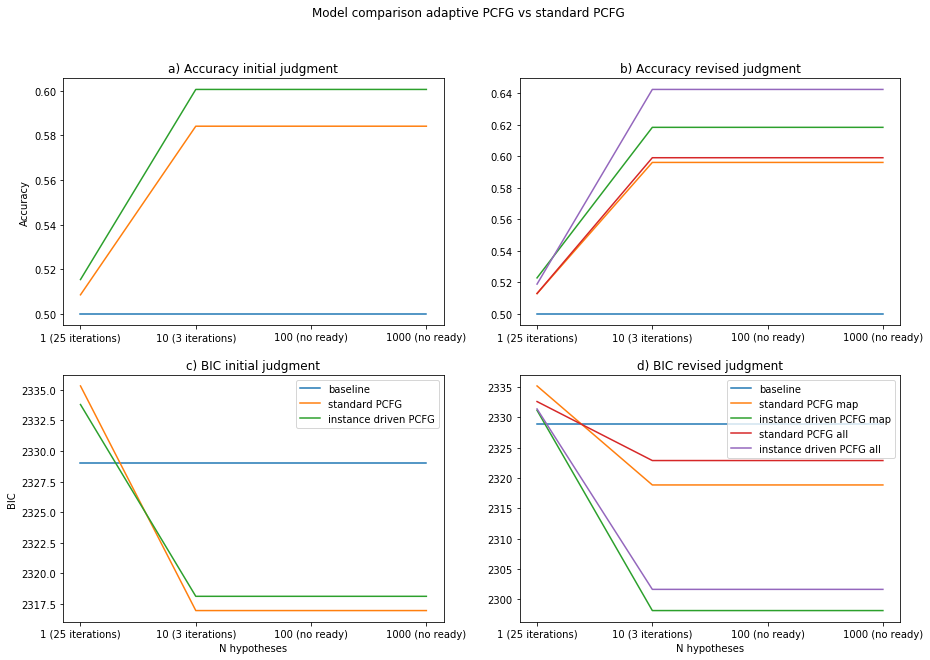

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

fig,axs = plt.subplots(2, 2,figsize=(15,10))
fig.suptitle('Model comparison adaptive PCFG vs standard PCFG')

plt.rcParams.update({'font.size': 10})
idpcfg= [0.515452380952381,0.6005952380952381,0.6005952380952381,0.6005952380952381]
spcfg = [0.5086190476190476,0.5841269841269842,0.5841269841269842,0.5841269841269842]
baseline = [.5,.5,.5,.5]
n_hyp = ["1 (25 iterations)", "10 (3 iterations)", "100 (no ready)", "1000 (no ready)"]

axs[0,0].set_title('a) Accuracy initial judgment')
axs[0,0].set(ylabel='Accuracy')
axs[0,0].plot(n_hyp, baseline, label="baseline")
axs[0,0].plot(n_hyp, spcfg, label="standard PCFG")
axs[0,0].plot(n_hyp, idpcfg, label="instance driven PCFG")



idpcfg= [0.5229047619047619,0.6182539682539683,0.6182539682539683,0.6182539682539683]
spcfg = [0.5129761904761905,0.596031746031746,0.596031746031746,0.596031746031746]
idpcfgall = [0.5189761904761905,0.6422619047619047,0.6422619047619047,0.6422619047619047]
spcfgall = [0.5130238095238095,0.5990079365079365,0.5990079365079365,0.5990079365079365,]
baseline = [.5,.5,.5,.5]
n_hyp = ["1 (25 iterations)", "10 (3 iterations)", "100 (no ready)", "1000 (no ready)"]

axs[0,1].set_title('b) Accuracy revised judgment')
# axs[0,1].set(xlabel='N hypotheses')
axs[0,1].plot(n_hyp, baseline, label="baseline")
axs[0,1].plot(n_hyp, spcfg, label="standard PCFG map")
axs[0,1].plot(n_hyp, idpcfg, label="instance driven PCFG map")
axs[0,1].plot(n_hyp, spcfgall, label="standard PCFG all")
axs[0,1].plot(n_hyp, idpcfgall, label="instance driven PCFG all")



idpcfg= [2333.7889330561907,2318.124929941801,2318.124929941801,2318.124929941801]
spcfg = [2335.3075145612365,2316.960761189024,2316.960761189024,2316.960761189024]
baseline = [2328.97452668141,2328.97452668141,2328.97452668141,2328.97452668141]
n_hyp = ["1 (25 iterations)", "10 (3 iterations)", "100 (no ready)", "1000 (no ready)"]

axs[1,0].set_title('c) BIC initial judgment')
axs[1,0].set(xlabel='N hypotheses', ylabel='BIC')
axs[1,0].plot(n_hyp, baseline, label="baseline")
axs[1,0].plot(n_hyp, spcfg, label="standard PCFG")
axs[1,0].plot(n_hyp, idpcfg, label="instance driven PCFG")
axs[1,0].legend()


idpcfg= [2331.172769855706,2298.119744697101,2298.119744697101,2298.119744697101]
spcfg = [2335.19442700203,2318.852766361464,2318.852766361464,2318.852766361464]
idpcfgall= [2331.395719175292,2301.6189907543776,2301.6189907543776,2301.6189907543776]
spcfgall = [2332.617471926627,2322.881333924679,2322.881333924679,2322.881333924679]
baseline = [2328.97452668141,2328.97452668141,2328.97452668141,2328.97452668141]
n_hyp = ["1 (25 iterations)", "10 (3 iterations)", "100 (no ready)", "1000 (no ready)"]

axs[1,1].set_title('d) BIC revised judgment')
axs[1,1].set(xlabel='N hypotheses')
axs[1,1].plot(n_hyp, baseline, label="baseline")
axs[1,1].plot(n_hyp, spcfg, label="standard PCFG map")
axs[1,1].plot(n_hyp, idpcfg, label="instance driven PCFG map")
axs[1,1].plot(n_hyp, spcfgall, label="standard PCFG all")
axs[1,1].plot(n_hyp, idpcfgall, label="instance driven PCFG all")
axs[1,1].legend()




plt.savefig('model_res_pdfs/idg_pcfg_comparison_cond_2.pdf')
plt.show()

